## COMPRESSED SENSING FOR MAGNETIC RESONANCE IMAGING ##

**INTRODUCTION**

Imaging speed is important in many MRI applications.However, the speed at which data can be collected in MRI is fundamentally limited by physical (gradient amplitude and slew-rate) and physiological (nerve stimulation) constraints. Therefore, many researches are seeking for methods to reduce the amount of acquired data without degrading the image quality.When k-space is undersampled, the Nyquist criterion is violated, and Fourier reconstructions exhibit aliasing artifacts.

Even though MRI is fascinating imaging technology.But still few challenges are always there that are of acquisition speed specially for the patients who are anxious,can't stay still and who have limited breath hold capacity.

Many previous proposals for reduced data imaging try to mitigate undersampling artifacts. They fall in three groups: 

(a) Methods generating artifacts that are incoherent or less visually apparent, at the expense of reduced apparent SNR.

(b) Methods exploiting redundancy in k-space, such as partial-Fourier, parallel imaging, etc.

(c) Methods exploiting either spatial or temporal redundancy or both.[1]

In this project we aim to explain this article we aim to exploit the sparsity which is implicit in MR images, and develop an approach combining elements of approaches a and c. By implicit sparsity we mean transform sparsity, i.e., the underlying object we aim to recover happens to have a sparse representation in a known and fixed mathematical transform domain.

**Compressed Sensing Ways In General**

There are many different types of norms. Perhaps the most common and widely recognized one is the norm:

x2=submission of all (x1)^2


The norm is nice because it is easily calculated, easily differentiated, and it has intuitive appeal (e.g., the norm of a vector is its length). A lot of very important algorithms and methods rely on the, including least squares fitting.That said, the norm isn’t the goto solution for everything. The other norms also have many interesting and useful properties.

Consider the norm:

x1=submission of all |x|

Instead of squaring each element, it simply takes its absolute value. Although the absolute value is annoying in the sense that it often introduces discontinuities in its derivatives, it does have some unique properties when compared to the squaring that takes place in the norm.[3] 

Compressed sensing is all about exploiting these properties.

**Compressed Sensing in MRI**

It is basically based on three golden rules, those are:

1> Incoherent Subsampling- Subsampling is typically accompained by a dictation of image quality.For example, the image would be either low resolution image or image with in folding artefacts. At this part incoherence comes into game. Incoherent means that the data are sampled randomly.So, both combine together to give two things:

> Subsampling increases speed.The fewer the raw data is to be sampled the faster the acquisition.

> With incoherence we avoid the distinct aliasing artefacts.

Infact the incoherence subsampling leads to noise like artefacts imposed over the image. 

Now,how to remove this noise from the image.Our rule no 2 is transform sparsity.

2> Transform Sparsity-An image is considered sparse when its information content is reflected in a few data points possible. Now, we could seperate the noise from image by creating a particular difference between them both by wavelet transform. So, now we can take a threshold and seperate the both signals by saying that signals below the threshold are irrelevant.

By doing this much of the noise will disappear and the image will be highly clear.

Its not that much easy to remove noise from MRI image so still there will be noise which we can remove by the next rule called non-linear iterative reconstruction.

3> Non-linear iterative reconstruction- Our main goal is to obtain the optimum balance in data consistency and sparsity that mean we want to remove as much noise as possible but not to remove useful image information.This could be possible after a defined number of iterations.

This way we will have speed and quality in harmony.[5]

Hence, These 3 golden rules give us required noise free and good quality image with high acquisition speed in less time.


Since the idea of compressed sensing can be applied in wide array of subjects, I’ll be focusing mainly on how to apply it in one and two dimensions to things like sounds and images. Speci×cally, I will show how to take a highly incomplete data set of signal samples and reconstruct the underlying sound or image. It is a very powerful technique.

To use this technique in python make sure following packages are installed:

So first we are going to create arbitrary linear data with some noise.

In [2]:
# make sure you've got the following packages installed
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx
# so first we are going to create arbitrary linear data with some noise
x = np.sort(np.random.uniform(0, 10, 15))
y = 3 + 0.2 * x + 0.1 * np.random.randn(len(x))

# find L1 line fit
l1_fit = lambda x0, x, y: np.sum(np.abs(x0[0] * x + x0[1] - y))
xopt1 = spopt.fmin(func=l1_fit, x0=[1, 1], args=(x, y))
# find L2 line fit
l2_fit = lambda x0, x, y: np.sum(np.power(x0[0] * x + x0[1] - y, 2))
xopt2 = spopt.fmin(func=l2_fit, x0=[1, 1], args=(x, y))

# adjust data by adding outlyers
y2 = y.copy()
y2[3] += 4
y2[13] -= 3
# refit the lines
xopt12 = spopt.fmin(func=l1_fit, x0=[1, 1], args=(x, y2))
xopt22 = spopt.fmin(func=l2_fit, x0=[1, 1], args=(x, y2))

Optimization terminated successfully.
         Current function value: 0.791201
         Iterations: 50
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.093203
         Iterations: 61
         Function evaluations: 119
Optimization terminated successfully.
         Current function value: 7.791212
         Iterations: 54
         Function evaluations: 101
Optimization terminated successfully.
         Current function value: 22.018689
         Iterations: 53
         Function evaluations: 104


So, the optimization of the function created is successful and we could make out function value after the iterations.

**Reconstruction of Single Signal**

In [3]:
# make sure you've got the following packages installed
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx

# sum of two sinusoids
n = 5000
t = np.linspace(0, 1/8, n)
y = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)
yt = spfft.dct(y, norm='ortho')

# extract small sample of signal
m = 500 # 10% sample
ri = np.random.choice(n, m, replace=False) # random sample of indices
ri.sort() # sorting not strictly necessary, but convenient for plotting
t2 = t[ri]
y2 = y[ri]

# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = A[ri]
# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)

# reconstruct signal
x = np.array(vx.value)
x = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +5e+03  1e+00  1e-02  1e+00  5e-01    ---    ---    0  1  - |  -  - 
 1  -3.421e-04  -0.000e+00  +6e+01  5e-01  1e-04  1e-02  6e-03  0.9890  1e-04   0  0  0 |  0  0
 2  -3.222e-06  -0.000e+00  +6e-01  1e-02  1e-06  1e-04  6e-05  0.9890  1e-04   0  0  0 |  0  0
 3  -2.945e-08  -0.000e+00  +7e-03  1e-04  2e-08  1e-06  7e-07  0.9890  1e-04   0  0  0 |  0  0
 4  -2.576e-10  -0.000e+00  +8e-05  1e-06  2e-10  2e-08  8e-09  0.9890  1e-04   0  0  0 |  0  0
 5  -2.098e-12  -0.000e+00  +9e-07  2e-08  2e-12  2e-10  9e-11  0.9890  1e-04   0  0  0 |  0  0
 6  -1.493e-14  -0.000e+00  +9e-09  2e-10  2e-14  2e-12  9e-13  0.9890  1e-04   0  0  0 |  0  0

OPTIMAL (within feastol=1.8e-10, reltol=6.4e+05, abstol=9.5e-09).
Runtime: 31.533928 seconds.



Here we have calculated the run time to acquire an image with good quality and with required iterations.

**Reconstruction of an Image(2D)**


In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx

def dct2(x):
 return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)
def idct2(x):
 return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

# read original image and downsize for speed
Xorig = spimg.imread('download.jpg', flatten=True, mode='L') # read in graysca
X = spimg.zoom(Xorig, 0.04)
ny,nx = X.shape

# extract small sample of signal
k = round(nx * ny * 0.5) # 50% sample
ri = np.random.choice(nx * ny, k, replace=False) # random sample of indices
b = X.T.flat[ri]
b = np.expand_dims(b, axis=1)
# create dct matrix operator using kron (memory errors for large ny*nx)
A = np.kron(
 spfft.idct(np.identity(nx), norm='ortho', axis=0),
 spfft.idct(np.identity(ny), norm='ortho', axis=0)
 )
A = A[ri,:] # same as phi times kron
# do L1 optimization
vx = cvx.Variable(nx * ny)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == b]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)
Xat2 = np.array(vx.value).squeeze()

# reconstruct signal
Xat = Xat2.reshape(nx, ny).T # stack columns
Xa = idct2(Xat)
# confirm solution
if not np.allclose(X.T.flat[ri], Xa.T.flat[ri]):
 print('Warning: values at sample indices don\'t match original.')
# create images of mask (for visualization)
mask = np.zeros(X.shape)
mask.T.flat[ri] = 255
Xm = 255 * np.ones(X.shape)
Xm.T.flat[ri] = X.T.flat[ri]


C:\ProgramData\Anaconda2\lib\site-packages\scipy\ndimage\interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


TypeError: 'float' object cannot be interpreted as an index

Here we are unable to create an image few errors. With further modifications and more knowledge we could probably solve it.

** An Example to Show Image Reconstruction**

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


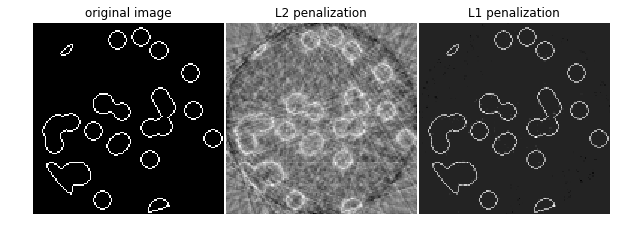

In [6]:
# Author: Emmanuelle Gouillart <emmanuelle.gouillart@nsup.org>
# License: BSD 3 clause

import numpy as np
from scipy import sparse
from scipy import ndimage
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


def _weights(x, dx=1, orig=0):
    x = np.ravel(x)
    floor_x = np.floor((x - orig) / dx)
    alpha = (x - orig - floor_x * dx) / dx
    return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))


def _generate_center_coordinates(l_x):
    X, Y = np.mgrid[:l_x, :l_x].astype(np.float64)
    center = l_x / 2.
    X += 0.5 - center
    Y += 0.5 - center
    return X, Y


def build_projection_operator(l_x, n_dir):
    """ Compute the tomography design matrix.

    Parameters
    ----------

    l_x : int
        linear size of image array

    n_dir : int
        number of angles at which projections are acquired.

    Returns
    -------
    p : sparse matrix of shape (n_dir l_x, l_x**2)
    """
    X, Y = _generate_center_coordinates(l_x)
    angles = np.linspace(0, np.pi, n_dir, endpoint=False)
    data_inds, weights, camera_inds = [], [], []
    data_unravel_indices = np.arange(l_x ** 2)
    data_unravel_indices = np.hstack((data_unravel_indices,
                                      data_unravel_indices))
    for i, angle in enumerate(angles):
        Xrot = np.cos(angle) * X - np.sin(angle) * Y
        inds, w = _weights(Xrot, dx=1, orig=X.min())
        mask = np.logical_and(inds >= 0, inds < l_x)
        weights += list(w[mask])
        camera_inds += list(inds[mask] + i * l_x)
        data_inds += list(data_unravel_indices[mask])
    proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
    return proj_operator


def generate_synthetic_data():
    """ Synthetic binary data """
    rs = np.random.RandomState(0)
    n_pts = 36
    x, y = np.ogrid[0:l, 0:l]
    mask_outer = (x - l / 2.) ** 2 + (y - l / 2.) ** 2 < (l / 2.) ** 2
    mask = np.zeros((l, l))
    points = l * rs.rand(2, n_pts)
    mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
    mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)
    res = np.logical_and(mask > mask.mean(), mask_outer)
    return np.logical_xor(res, ndimage.binary_erosion(res))


# Generate synthetic images, and projections
l = 128
proj_operator = build_projection_operator(l, l / 7.)
data = generate_synthetic_data()
proj = proj_operator * data.ravel()[:, np.newaxis]
proj += 0.15 * np.random.randn(*proj.shape)

# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

# Reconstruction with L1 (Lasso) penalization
# the best value of alpha was determined using cross validation
# with LassoCV
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)

plt.figure(figsize=(8, 3.3))
plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('original image')
plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L2 penalization')
plt.axis('off')
plt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L1 penalization')
plt.axis('off')

plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
                    right=1)

plt.show()

Hence, We have seen that is idea could be very successful in medical world.It could make the cumbersome procedure of MRI much more easier and relaxing for patients as well as physicians.

Much more to come in this way.

** TEST YOUR KNOWLEDGE **

> Can this field be explored more for EEG and ECG signals also? If yes why? If No why not?

> Did the last example clear your doubts about the use of this in MR imaging?

> Will compressed sensing be really helpful in medical field?

> Where else you think this could be applicable and bring fruitful result?

**REFERENCES**

1. *"Sparse MRI: The Application of Compressed Sensing for Rapid MR Imaging"*- Michael Lustig,David Donoho,and John M. Pauly.

2. *"Data-driven modeling and scientific computing: Methods for Integrating Dynamics of Complex Systems and Big Data"*-J.N.Kutz.

3. *"An introduction to compressive sampling"*-Candè,Emmanuel J.,and Michael B. Wakin-Signal Processing Magazine, IEEE 25.2 (2008): 21-30.

4. *"Scalable training of L1-regularized log-linear models"*-Andrew, Galen,and Jianfeng Gao-Proceedings of the 24th international conference on Machine learning,ACM,2007.

5. *"MAGNETUM FLASH-The Magazine of MRI"*-SIEMENS Healthcare GmbH,Germany.